In [1]:
from bs4 import BeautifulSoup
import os
import glob
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time
import xml.etree.ElementTree as ET
from sklearn.metrics import f1_score

In [2]:
path="Train-corups/*/*"
filenames=glob.glob(path)
print(len(filenames))

520


In [32]:
def get_word(word):
    if word.tag=='w' or word.tag =='c':
        try:
            return word.text.rstrip()
        except:
            return None
    if word.tag=='mw':
        w=''
        for grandchild in word:
            w+=grandchild.text.rstrip()
        return w
    return None
def check_word(word):
    if word.tag=='w' or word.tag =='mw' or word.tag=='c':
        return True
    return False

In [7]:
q=time.time()
transition_matrix={}
tag_word_table={}
tag_tag_table={}
emission_matrix={}
for filename in filenames:
    print(filename,time.time()-q)
    tree = ET.parse(filename)
    root = tree.getroot()
    for all_words in root.iter('s'):
        words=[]
        for word in all_words:
            if check_word(word):
                words.append(word)
        for word in words:
            w=get_word(word)
            if w==None:
                continue
            tags=word.attrib['c5']
#             print(w,tag)
            tags=tags.split('-',2)
            for tag in tags:
                try:
                    try:
                        tag_word_table[tag][w] += 1
                    except:
                        tag_word_table[tag][w] = 1
                except:
                    tag_word_table[tag] = {w: 1}
        if len(words)>0:
            tagbeg=words[0].attrib['c5']
            tagbeg=tagbeg.split('-',2)
            for tag0 in tagbeg:
                try:
                    try:
                        tag_tag_table["SRT"][tag0] += 1
                    except:
                        tag_tag_table["SRT"][tag0] = 1
                except:
                    tag_tag_table["SRT"] = {tag0: 1}     
            tagslast=words[len(words)-1].attrib['c5']
            tagslast=tagslast.split('-',2)
            for taglast in tagslast:
                try:
                    try:
                        tag_tag_table[taglast]["END"] += 1
                    except:
                        tag_tag_table[taglast]["END"] = 1
                except:
                    tag_tag_table[taglast] = {"END": 1}  
        for i in range(len(words)-1):
            tags1=words[i].attrib['c5']
            tags2=words[i+1].attrib['c5']
            tags1=tags1.split('-',2)
            tags2=tags2.split('-',2)
            for tag1 in tags1:
                for tag2 in tags2:
                    try:
                        try:
                            tag_tag_table[tag1][tag2] += 1
                        except:
                            tag_tag_table[tag1][tag2] = 1
                    except:
                        tag_tag_table[tag1] = {tag2: 1}  
#         break
#     break

Train-corups\A1\A10.xml 0.0
Train-corups\A1\A11.xml 0.19166135787963867
Train-corups\A1\A12.xml 0.4220438003540039
Train-corups\A1\A13.xml 0.6663870811462402
Train-corups\A1\A14.xml 0.7003183364868164
Train-corups\A1\A15.xml 0.7970051765441895
Train-corups\A1\A16.xml 1.0074443817138672
Train-corups\A1\A17.xml 1.2099347114562988
Train-corups\A1\A18.xml 1.3714704513549805
Train-corups\A1\A19.xml 1.5789141654968262
Train-corups\A1\A1A.xml 1.8422064781188965
Train-corups\A1\A1B.xml 2.1743555068969727
Train-corups\A1\A1D.xml 2.4595541954040527
Train-corups\A1\A1E.xml 2.496455430984497
Train-corups\A1\A1F.xml 2.5802314281463623
Train-corups\A1\A1G.xml 2.620593309402466
Train-corups\A1\A1H.xml 2.6655006408691406
Train-corups\A1\A1J.xml 2.6904006004333496
Train-corups\A1\A1K.xml 2.78019380569458
Train-corups\A1\A1L.xml 2.7931602001190186
Train-corups\A1\A1M.xml 2.803133726119995
Train-corups\A1\A1N.xml 2.8250741958618164
Train-corups\A1\A1P.xml 2.891916275024414
Train-corups\A1\A1R.xml 2.91081

Train-corups\A7\A7D.xml 20.07649874687195
Train-corups\A7\A7F.xml 20.48443865776062
Train-corups\A7\A7G.xml 20.71578621864319
Train-corups\A7\A7H.xml 20.955061674118042
Train-corups\A7\A7J.xml 21.325065851211548
Train-corups\A7\A7K.xml 21.59937024116516
Train-corups\A7\A7L.xml 21.767918348312378
Train-corups\A7\A7N.xml 22.08503222465515
Train-corups\A7\A7P.xml 22.242663145065308
Train-corups\A7\A7S.xml 22.35145401954651
Train-corups\A7\A7T.xml 22.38931679725647
Train-corups\A7\A7U.xml 22.43020725250244
Train-corups\A7\A7V.xml 22.43419647216797
Train-corups\A7\A7W.xml 22.47412347793579
Train-corups\A7\A7X.xml 22.639646530151367
Train-corups\A7\A7Y.xml 22.650616884231567
Train-corups\A8\A80.xml 22.726415634155273
Train-corups\A8\A81.xml 22.82220959663391
Train-corups\A8\A82.xml 22.82920002937317
Train-corups\A8\A83.xml 22.832189083099365
Train-corups\A8\A84.xml 22.866077661514282
Train-corups\A8\A85.xml 22.86971378326416
Train-corups\A8\A86.xml 22.912599802017212
Train-corups\A8\A87.xml 

Train-corups\AH\AHL.xml 46.105732440948486
Train-corups\AH\AHM.xml 46.13580536842346
Train-corups\AH\AHN.xml 46.14976692199707
Train-corups\AH\AHP.xml 46.51085424423218
Train-corups\AH\AHR.xml 46.54376721382141
Train-corups\AH\AHS.xml 46.59461426734924
Train-corups\AH\AHT.xml 46.60056257247925
Train-corups\AH\AHU.xml 46.67440152168274
Train-corups\AH\AHV.xml 46.90674352645874
Train-corups\AH\AHW.xml 46.93367385864258
Train-corups\AH\AHX.xml 46.93970799446106
Train-corups\AH\AHY.xml 47.16206073760986
Train-corups\AJ\AJ0.xml 47.21292328834534
Train-corups\AJ\AJ1.xml 47.245872497558594
Train-corups\AJ\AJ2.xml 47.25082349777222
Train-corups\AJ\AJ3.xml 47.38446640968323
Train-corups\AJ\AJ4.xml 47.48619341850281
Train-corups\AJ\AJ5.xml 47.49716401100159
Train-corups\AJ\AJ6.xml 47.52110052108765
Train-corups\AJ\AJ7.xml 47.703667640686035
Train-corups\AJ\AJ8.xml 47.713640451431274
Train-corups\AJ\AJ9.xml 47.771466970443726
Train-corups\AJ\AJA.xml 47.858251094818115
Train-corups\AJ\AJB.xml 48.0

In [8]:
print(len(tag_tag_table.keys()),len(tag_word_table.keys()))

62 61


In [9]:
for tags in tag_word_table.keys():
    total_count=sum(tag_word_table[tags].values())
    for words in tag_word_table[tags].keys():
        tag_word_table[tags][words]/=total_count
for tags in tag_tag_table.keys():
    total_count=sum(tag_tag_table[tags].values())
    for tag in tag_tag_table[tags].keys():
        tag_tag_table[tags][tag]/=total_count
print(tag_word_table)
print(tag_tag_table)
emission_matrix=tag_word_table
transition_matrix=tag_tag_table

{'NN1': {'NEWS': 2.009165684227855e-05, 'FOCUS': 5.184943701233174e-06, 'Age': 0.0001827692654684694, 'Concern': 0.00010434699198731763, 'House': 0.0010168970834043562, 'Tel': 5.96268525641815e-05, 'Editor': 0.00024045176414468845, 'Issue': 6.481179626541468e-06, 'month': 0.001144576322047223, 'News': 0.00020739774804932697, 'Focus': 2.592471850616587e-05, 'Training': 0.00010045828421139275, 'Publishing': 3.240589813270734e-05, 'design': 0.0005586776838078745, 'past': 0.0007524649546414644, 'newsletter': 1.8795420916970256e-05, 'format': 5.96268525641815e-05, 'banner': 5.1201319049677594e-05, 'Local': 6.870050404133955e-05, 'Look': 3.175778017005319e-05, 'launch': 0.00011666123327774642, 'campaign': 0.0009864355391596114, 'pack': 0.00015165960326107034, 'style': 0.0008516270029275488, 'Chairman': 0.00011471687938978398, 'Party': 0.0013934536197064155, 'Body': 6.675615015337711e-05, 'directory': 2.4628482580857577e-05, 'publication': 0.00017628808584192792, 'preparation': 0.000165918198

In [12]:
class_names = ['SRT','NN1', 'VVB', 'CJC', 'PRP', 'AT0', 'NP0', 
'VBZ', 'POS', 'AJ0', 'CJS', 'VHZ', 'NN2', 'VBB', 
'VVN', 'AVP', 'PRF', 'VVZ', 'AV0', 'CRD', 'DTQ', 
'ORD', 'VBD', 'DPS', 'VVD', 'NN0', 'DT0', 'VHD', 
'VBG', 'PNP', 'VVG', 'TO0', 'VVI', 'VM0', 'VBI', 
'AJC', 'VHB', 'VBN', 'CJT', 'AJS', 'VDI', 'VDZ', 
'XX0', 'AVQ', 'EX0', 'VHI', 'VDD', 'UNC', 'PNI', 
'VDB', 'VDN', 'VHG', 'ZZ0', 'PNX', 'VHN','PNQ', 'ITJ', 'VDG','PUN','PUQ','PUL','PUR','END']
class_numbers={}
i=0
for tag in class_names:
    class_numbers[tag]=i
    i+=1
print(class_numbers)

{'SRT': 0, 'NN1': 1, 'VVB': 2, 'CJC': 3, 'PRP': 4, 'AT0': 5, 'NP0': 6, 'VBZ': 7, 'POS': 8, 'AJ0': 9, 'CJS': 10, 'VHZ': 11, 'NN2': 12, 'VBB': 13, 'VVN': 14, 'AVP': 15, 'PRF': 16, 'VVZ': 17, 'AV0': 18, 'CRD': 19, 'DTQ': 20, 'ORD': 21, 'VBD': 22, 'DPS': 23, 'VVD': 24, 'NN0': 25, 'DT0': 26, 'VHD': 27, 'VBG': 28, 'PNP': 29, 'VVG': 30, 'TO0': 31, 'VVI': 32, 'VM0': 33, 'VBI': 34, 'AJC': 35, 'VHB': 36, 'VBN': 37, 'CJT': 38, 'AJS': 39, 'VDI': 40, 'VDZ': 41, 'XX0': 42, 'AVQ': 43, 'EX0': 44, 'VHI': 45, 'VDD': 46, 'UNC': 47, 'PNI': 48, 'VDB': 49, 'VDN': 50, 'VHG': 51, 'ZZ0': 52, 'PNX': 53, 'VHN': 54, 'PNQ': 55, 'ITJ': 56, 'VDG': 57, 'PUN': 58, 'PUQ': 59, 'PUL': 60, 'PUR': 61, 'END': 62}


In [13]:
class_size=len(class_names)
transmat=np.empty((class_size,class_size),dtype=np.float64)

In [14]:
for i in range(class_size):
    for j in range(class_size):
        try:
            transmat[i][j]=transition_matrix[class_names[i]].get(class_names[j])
        except:
            transmat[i][j]=0
        if np.isnan(transmat[i][j]):
            transmat[i][j]=0

In [15]:
print(transmat[14][15])
print(transition_matrix['VVN']['AVP'])

0.053510475639489234
0.053510475639489234


In [16]:
print(transition_matrix['NN1'].get('NN2'))

0.04668212524694832


In [17]:
print(transmat[class_numbers['NN1']][class_numbers['NN2']])

0.04668212524694832


In [18]:
path="Test-corpus/*/*"
filenames=glob.glob(path)
print(len(filenames))

115


In [41]:
# multiword wala

q=time.time()
node_vectors={}
node_probabilities=np.empty(class_size,dtype=np.float64)
count=0
correct=0
wrong=0
checkzero=0
count1=0
index=0
correct_tags=[]
predicted_tags=[]




for filename in filenames:
    print(filename,time.time()-q)
    tree = ET.parse(filename)
    root = tree.getroot()
    for all_words in root.iter('s'):
        words=[]
        for word in all_words:
            if check_word(word):
                words.append(word)
        for tag in class_names:
            node_vectors[tag]=[]
            node_vectors[tag].append("SRT")
        if len(words)==0:
            continue
        w=get_word(words[0])
        node_probabilities=transmat[0].copy()
        temp_np=node_probabilities.copy()
        temp_emission=np.empty(class_size,np.float64)
        for i in range(class_size):
            try:
                temp_emission[i]=emission_matrix[class_names[i]].get(w)
            except:
                temp_emission[i]=0.0
        temp_emission=np.nan_to_num(temp_emission)
        temp_np*=temp_emission
        if np.all((temp_np == 0))==False:
            node_probabilities=temp_np.copy()          
        node_probabilities=np.expand_dims(node_probabilities, axis=1)
        indices_left=np.where(node_probabilities.any(axis=1))[0]
        node_probabilities=np.take(node_probabilities,indices_left,axis=0)
        for i in range(len(words)-1):
            
#             creating temp emission for multiplication
            w=get_word(words[i+1])
            temp_emission=np.empty(class_size,np.float64)
            for j in range(class_size):
                try:
                    temp_emission[j]=emission_matrix[class_names[j]].get(w)
                except:
                    temp_emission[j]=0.0
            temp_emission=np.nan_to_num(temp_emission)
            temp_emission=np.expand_dims(temp_emission, axis=0)
            temp_transmat=np.take(transmat,indices_left,axis=0).copy()
#             print(temp_emission)
            if ~np.any(temp_emission):
                temp_emission[:]=0.000001
#                 print(temp_emission)
            indices_right=np.where(temp_emission.any(axis=0))[0]
#             print(indices_left,indices_right)
            temp_emission=np.take(temp_emission,indices_right,axis=1)
            temp_transmat=np.take(temp_transmat,indices_right,axis=1).copy()
#             print(node_probabilities.shape,temp_transmat.shape,temp_emission.shape)
#             print(temp_emission)
#             temp_np=node_probabilities.copy()
            temp_node_vectors=node_vectors.copy()
            node_probabilities=temp_transmat*node_probabilities
#             temp_np=node_probabilities.copy()

            temp_np=node_probabilities*temp_emission
#             f=np.where(~temp_np.any(axis=0))[0]
#             for j in f:
#                 temp_np[:,j]=node_probabilities[:,j]*0.000001
#             f=np.where(~temp_np.any(axis=0))[0]
            A = np.array(temp_np, dtype=float)
            maxs = np.vstack([A, np.abs(A)]).argmax(axis=0) % A.shape[0]
            node_probabilities=A[maxs, np.arange(A.shape[1])].copy()
            node_probabilities=np.expand_dims(node_probabilities, axis=1)
            f=maxs
#             print(temp_np)
#             print(f)
            for j in range(len(indices_right)):
                temp_node_vectors[class_names[indices_right[j]]]=node_vectors[class_names[indices_left[f[j]]]].copy()
                temp_node_vectors[class_names[indices_right[j]]].append(class_names[indices_left[f[j]]])
#                 print(indices_right[j],indices_left[f[j]])
#             print("\n")
            node_vectors=temp_node_vectors.copy()
            indices_left=indices_right
        temp_transmat=np.take(transmat,indices_left,axis=0).copy()
        node_probabilities=node_probabilities*temp_transmat[:,class_size-1]
        f=np.where(node_probabilities == np.amax(node_probabilities))
        besttag=class_names[indices_left[f[0][0]]]
        node_vectors[besttag].append(besttag)
        count+=len(words)
        for i in range(len(words)):
            t=words[i].attrib['c5']
            t=t.split('-',2)
            if len(t)==1:
                if t[0]==node_vectors[besttag][i+1]:
                    correct+=1
                else:
                    wrong+=1
                correct_tags.append(t[0])
                predicted_tags.append(node_vectors[besttag][i+1])
            else:
                if t[0]==node_vectors[besttag][i+1] or t[1]==node_vectors[besttag][i+1]:
                    correct+=1
                    if t[0]==node_vectors[besttag][i+1]:
                        correct_tags.append(t[0])
                    else:
                        correct_tags.append(t[1])
                else:
                    correct_tags.append(t[0])
                    wrong+=1
                predicted_tags.append(node_vectors[besttag][i+1])
# print(node_vectors[besttag])
# print(correct_tags)
print(correct,wrong)
print(correct+wrong)
print(count,count1)
print(checkzero)
print(correct/(correct+wrong))
print(time.time()-q)

Test-corpus\AN\AN0.xml 0.001995563507080078
Test-corpus\AN\AN1.xml 5.153324127197266
Test-corpus\AN\AN2.xml 7.559739351272583
Test-corpus\AN\AN3.xml 12.979713201522827
Test-corpus\AN\AN4.xml 19.11393642425537
Test-corpus\AN\AN5.xml 26.846036672592163
Test-corpus\AN\AN7.xml 33.73002791404724
Test-corpus\AN\AN8.xml 41.571993589401245
Test-corpus\AN\AN9.xml 47.37213325500488
Test-corpus\AN\ANA.xml 53.13312554359436
Test-corpus\AN\ANB.xml 57.459837675094604
Test-corpus\AN\ANC.xml 62.01870584487915
Test-corpus\AN\AND.xml 67.37875461578369
Test-corpus\AN\ANF.xml 72.45522117614746
Test-corpus\AN\ANH.xml 77.38400030136108
Test-corpus\AN\ANJ.xml 82.11779117584229
Test-corpus\AN\ANK.xml 84.23825192451477
Test-corpus\AN\ANL.xml 89.41288208961487
Test-corpus\AN\ANM.xml 95.9658522605896
Test-corpus\AN\ANP.xml 100.15503907203674
Test-corpus\AN\ANR.xml 103.31782245635986
Test-corpus\AN\ANS.xml 109.02257823944092
Test-corpus\AN\ANT.xml 112.96249485015869
Test-corpus\AN\ANU.xml 118.43184614181519
Test-

In [42]:
c=correct
w=wrong
print("Accuracy = ",c/(c+w)*100,"%")
print("Words Tested = ",c+w)

Accuracy =  97.11657050230507 %
Words Tested =  4063009


63
0.9711657050230507
0.9711657050230507
0.9711657050230507


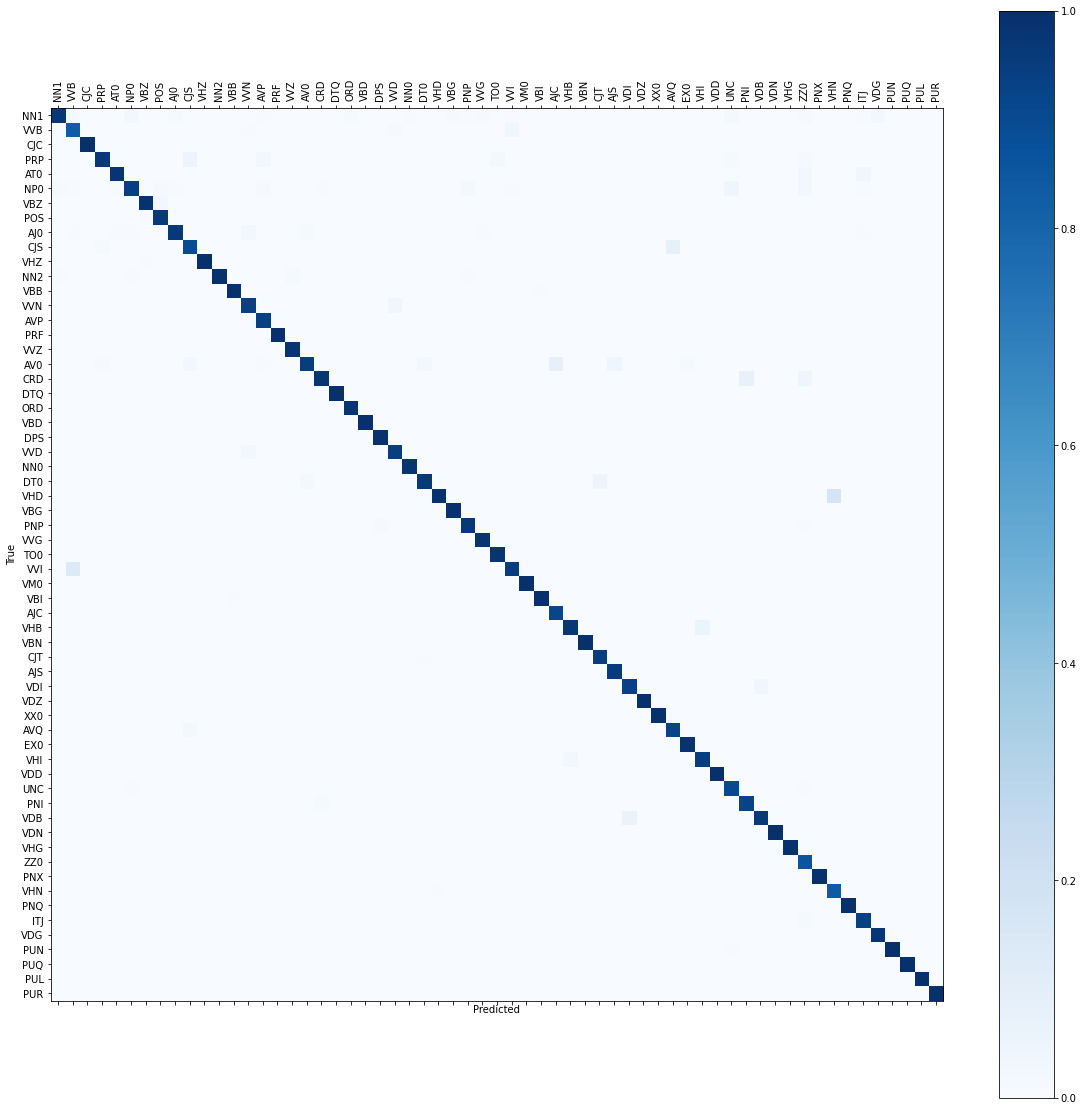

In [46]:
# class_names=['SRT', 'NN2', 'AT0', 'NN1', 'AV0', 'PRP', 'VHZ', 'DT0', 'PRF', 'VHB', 'CRD', 'TO0', 'VVI', 'VVN', 'CJC', 'PRP-AVP', 'VVG', 'EX0', 'VBB', 'AJ0', 'AJ0-NN1', 'VVZ', 'VBZ', 'CJT', 'POS', 'PNP', 'CJS', 'DPS', 'PNQ', 'VVB', 'VVN-AJ0', 'PNI', 'DTQ', 'NN1-VVB', 'NN0', 'XX0', 'VBN', 'VVD', 'AVP', 'NP0', 'NN1-VVG', 'NN1-AJ0', 'UNC', 'VBD', 'AJ0-VVG', 'VVD-VVN', 'NN2-VVZ', 'ORD', 'AVQ-CJS', 'CJS-PRP', 'VM0', 'AJS', 'VBI', 'VVN-VVD', 'VHI', 'VDZ', 'ZZ0', 'AVP-PRP', 'AVQ', 'VVB-NN1', 'VDN', 'VDB', 'PNX', 'CJT-DT0', 'VVG-AJ0', 'VBG', 'VHG', 'VHD', 'NP0-NN1', 'ITJ', 'VVG-NN1', 'NN1-NP0', 'AJ0-VVN', 'VVZ-NN2', 'AJ0-AV0', 'AJC', 'AV0-AJ0', 'DT0-CJT', 'VDD', 'PNI-CRD', 'VHN', 'AJ0-VVD', 'PRP-CJS', 'VDI', 'CJS-AVQ', 'VVD-AJ0', 'VDG', 'CRD-PNI','END','PUN','PUL','PUQ','PUR']
print(len(class_names))
cf = confusion_matrix(correct_tags,predicted_tags,class_names[1:-1],normalize="pred")
precision = precision_score(correct_tags, predicted_tags,labels=class_names, average='micro')
recall = recall_score(correct_tags, predicted_tags,labels=class_names, average='micro')
score = f1_score(correct_tags, predicted_tags,labels=class_names, average='micro')
print(precision)
print(recall)
print(score)

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1)

# plot the matrix
cax = ax.matshow(cf,cmap="Blues")
# add colorbar for reference
fig.colorbar(cax)

ax.set_xticks(range(len(class_names)-2))
ax.set_yticks(range(len(class_names)-2))

ax.set_xticklabels(class_names[1:-1])
ax.set_yticklabels(class_names[1:-1])

plt.xticks(rotation=90)

# add labels to plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("Conf_Mat_Updated.jpg")
plt.show()
# plt.savefig('cf.png')